In [1]:
# installing pandas
# pip install pandas

# 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

## Reading the Data

In [3]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
968,3673,Female,55.0,0,0,Yes,Private,Rural,112.47,32.8,smokes,0
3787,34965,Female,18.0,0,0,No,Private,Urban,95.87,23.0,never smoked,0
4806,69723,Male,15.0,0,0,No,Private,Urban,137.27,19.3,never smoked,0
3870,65888,Male,12.0,0,0,No,children,Rural,117.04,18.1,Unknown,0
889,55721,Male,62.0,0,1,Yes,Self-employed,Urban,56.31,24.3,formerly smoked,0
3923,21101,Male,71.0,0,0,Yes,Private,Rural,67.99,31.1,never smoked,0
2779,35276,Female,6.0,0,0,No,children,Rural,84.10,19.8,Unknown,0
317,37089,Female,37.0,1,0,Yes,Self-employed,Rural,127.71,36.0,never smoked,0
598,31090,Male,15.0,0,0,No,children,Rural,205.50,24.2,never smoked,0
1826,16091,Male,14.0,0,0,No,Private,Rural,103.44,20.1,never smoked,0


# General Analysis

In [4]:
# type(stroke_data)
stroke_data.info()
# stroke_data.shape
stroke_data.describe()
# stroke_data.columns
stroke_data.duplicated().sum()
total_cells=np.product(stroke_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Analysis on Gender Base

In [5]:
# total Number of Male and Female in the Data
total_males=(stroke_data["gender"]=="Male").sum()
total_female=(stroke_data["gender"]=="Female").sum()

In [6]:
# finding all the Female who have stroke
no_female_stroke=(stroke_data[(stroke_data['gender']=="Female") & (stroke_data['stroke']==1)])
no_female_stroke = no_female_stroke.count()["id"]

In [7]:
# finding all the male who have stroke
no_male_stroke=(stroke_data[(stroke_data['gender']=="Male") & (stroke_data['stroke']==1)])
no_male_stroke = no_male_stroke.count()["id"]

In [8]:
print(f"NO of Male that have Stroke :{no_male_stroke}")
print(f"NO of Feale that have Stroke :{no_female_stroke}")
print(f"Total NO have Stroke:\t  {no_male_stroke+no_female_stroke}")

NO of Male that have Stroke :108
NO of Feale that have Stroke :141
Total NO have Stroke:	  249


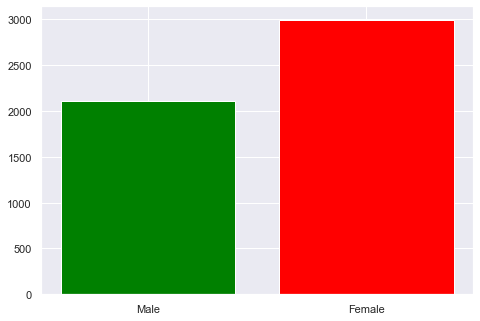

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count = [total_males,total_female]
ax.bar(gender,count,color=['green', 'red'])
plt.show()

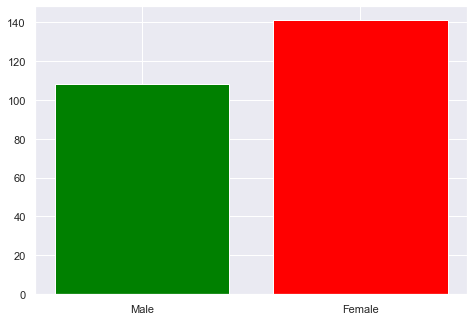

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
ratio = [no_male_stroke,no_female_stroke]
ax.bar(gender,ratio,color=['green', 'red'])
plt.show()

In [11]:
# Calculating the amount and percentage of female and male patients
# print(stroke_data.gender.value_counts())


total_patients=no_female_stroke+no_male_stroke
female_percent = no_female_stroke * 100 / total_patients
male_percen = no_male_stroke * 100 / total_patients

print(f'Female Patients:\t{no_female_stroke}---   {female_percent}%')
print(f'Male Patients:  \t{no_male_stroke}---   {male_percen}%')    

Female Patients:	141---   56.626506024096386%
Male Patients:  	108---   43.373493975903614%


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

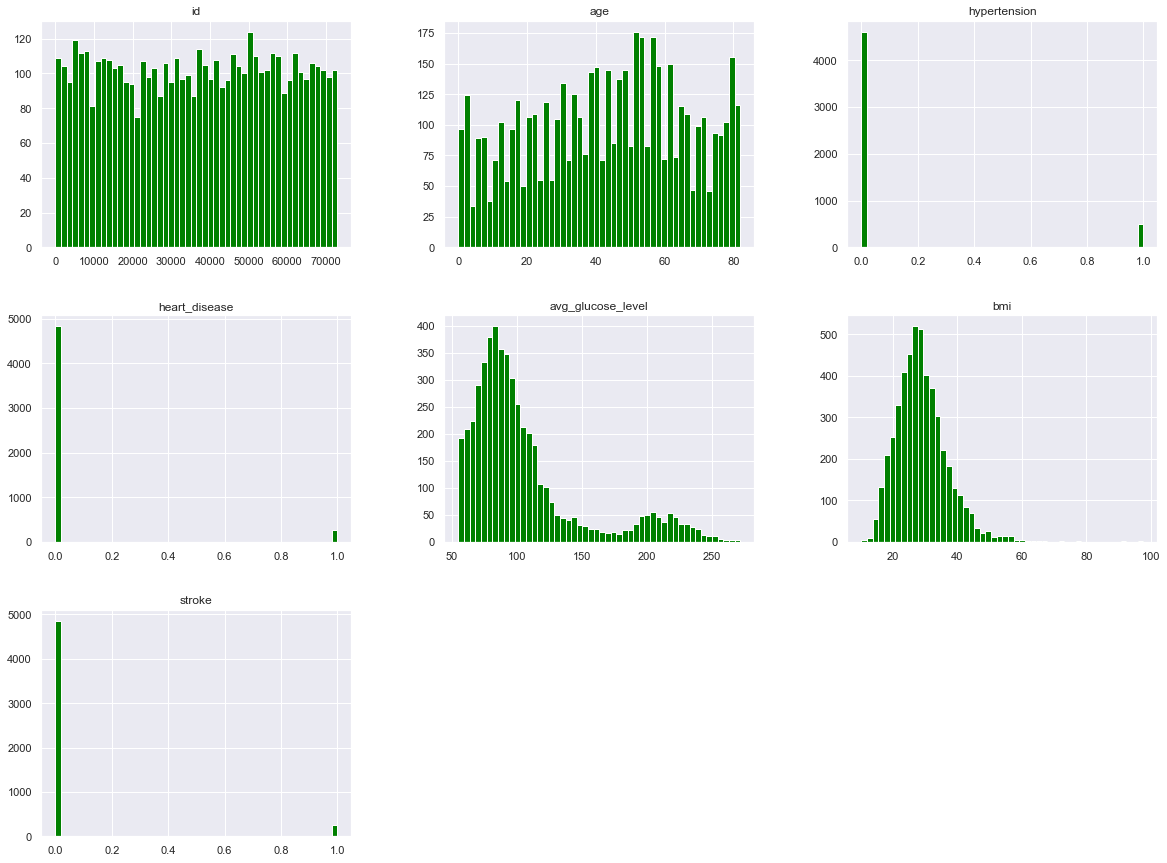

In [12]:
stroke_data.hist(bins=50,figsize=(20,15), color="green")


In [13]:
def bar_plot(variable):
    var = stroke_data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "orange", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()

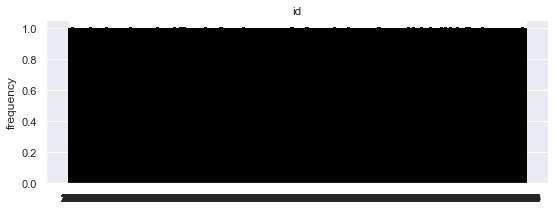

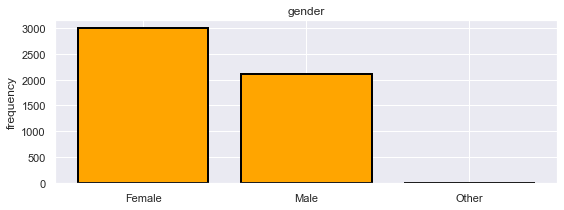

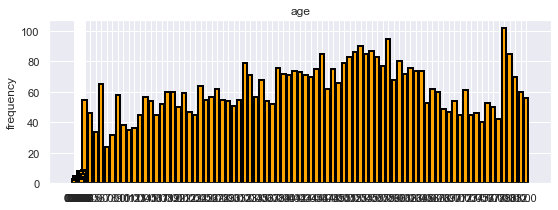

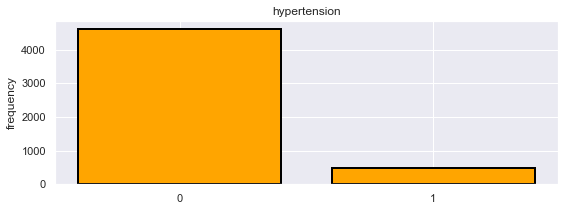

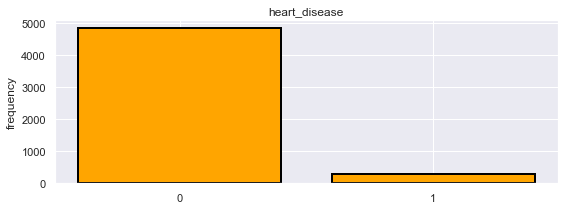

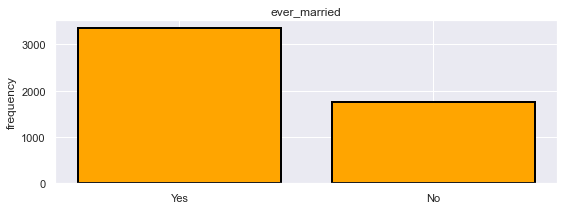

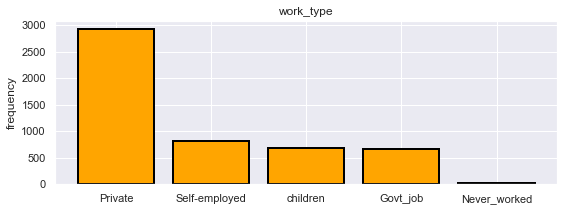

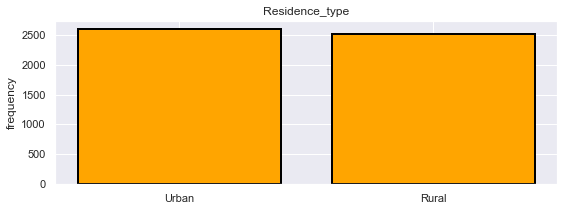

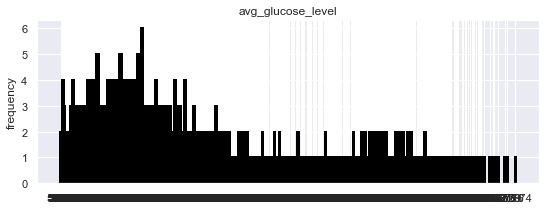

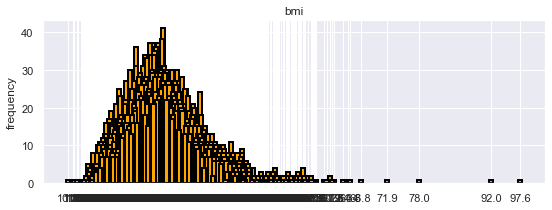

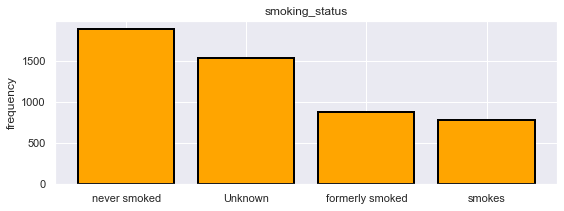

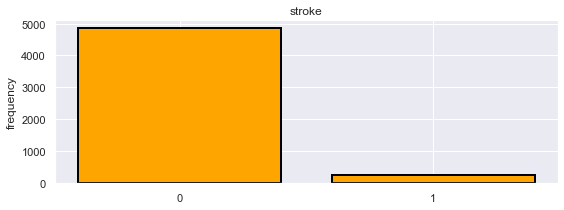

In [14]:
from matplotlib import pyplot as plt
cols= stroke_data.columns
for col in cols:
    bar_plot(col)

<AxesSubplot:>

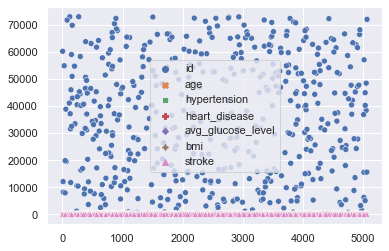

In [15]:
sample_data=stroke_data.sample(500)
sns.scatterplot(data=sample_data)

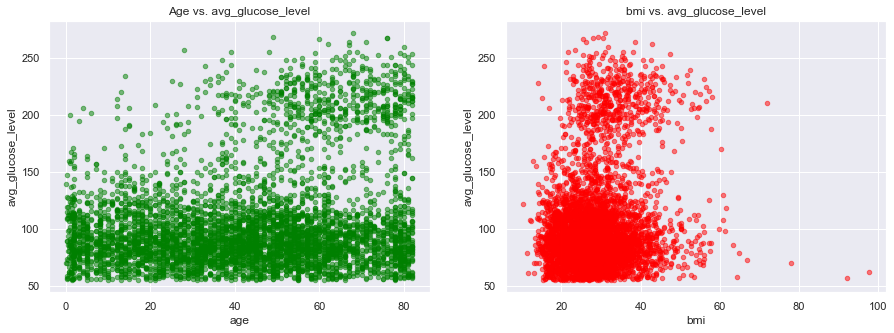

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke_data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke_data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

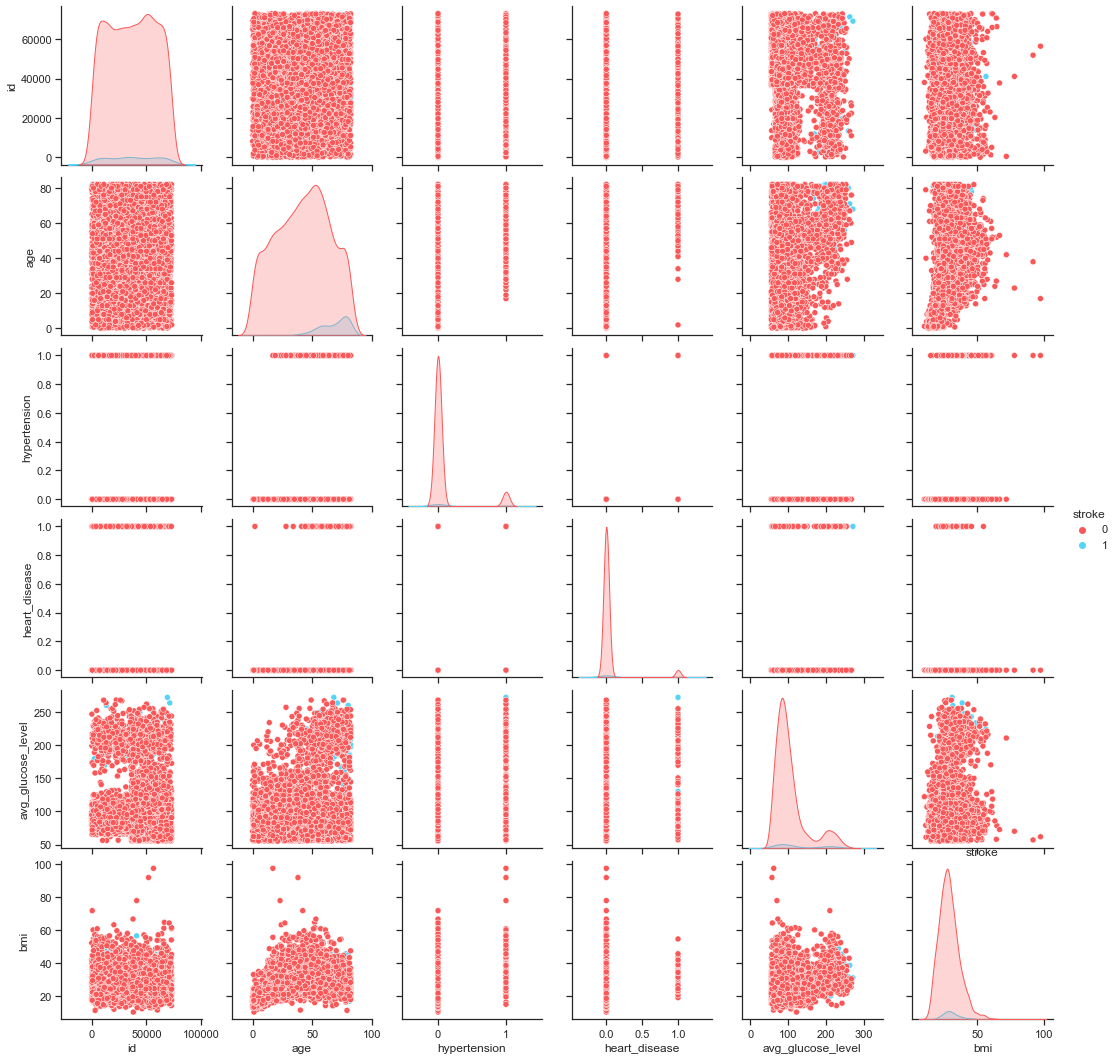

In [17]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(stroke_data, hue="stroke", palette=pal);
plt.title("stroke");

<AxesSubplot:xlabel='ever_married', ylabel='count'>

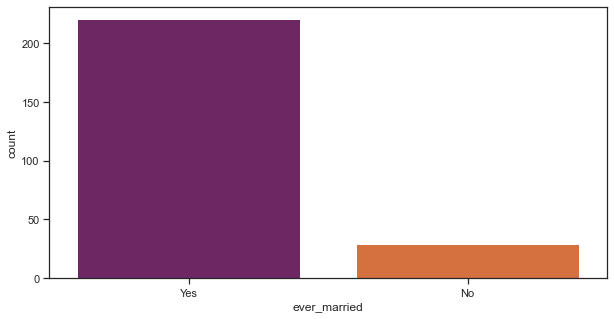

In [18]:
plt.figure(figsize=(10,5))
strok=stroke_data.loc[stroke_data['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno')

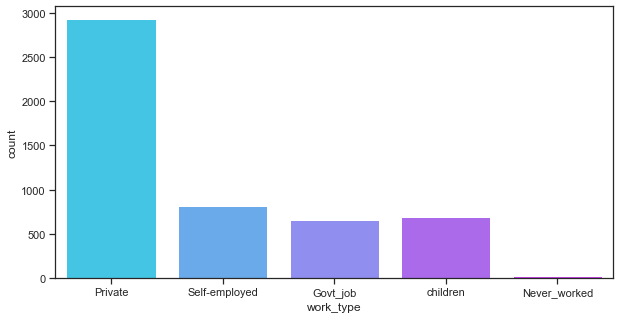

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_data,x='work_type',palette='cool');

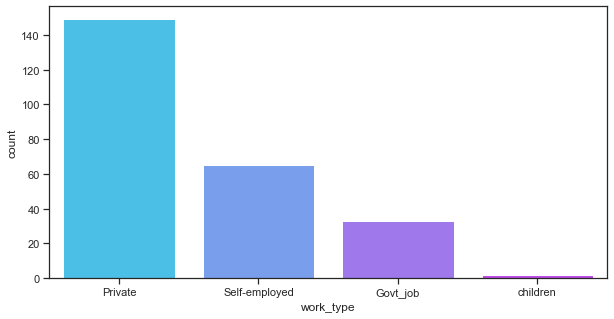

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

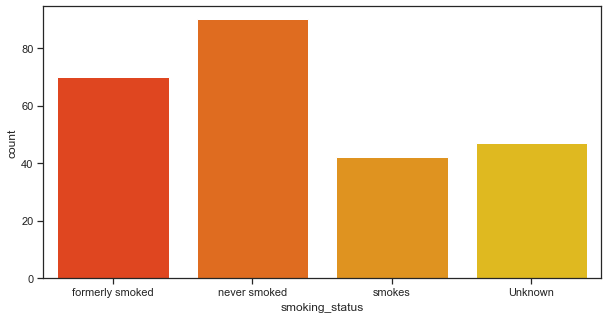

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

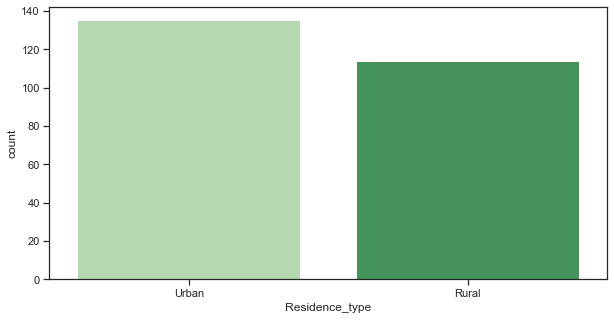

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

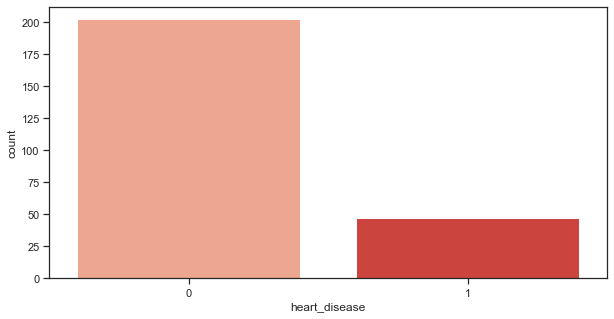

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

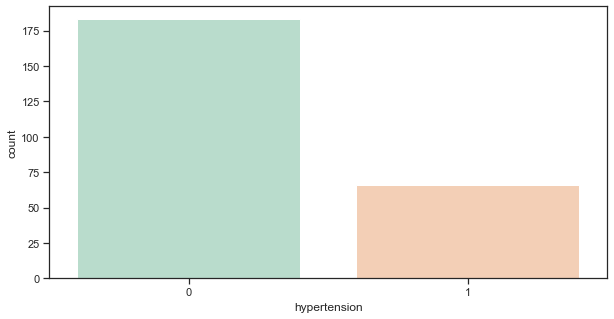

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

In [25]:
stroke_data["age"]

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

In [26]:
# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+
# Infant = 0-1 year.
(stroke_data["age"]<=1).sum()
# Toddler = 2-4 yrs.
stroke_data.loc[(stroke_data['age'] > 1) & (stroke_data['age'] <=4)].count()
# Child = 5-12 yrs.
stroke_data.loc[(stroke_data['age'] > 4) & (stroke_data['age'] <=12)].count()
# Teen = 13-19 yrs.
stroke_data.loc[(stroke_data['age'] > 12) & (stroke_data['age'] <=19)].count()
# Adult = 20-39 yrs
stroke_data.loc[(stroke_data['age'] > 19) & (stroke_data['age'] <=39)].count()
# Middle Age Adult = 40-59 yrs
stroke_data.loc[(stroke_data['age'] > 39) & (stroke_data['age'] <=59)].count()
# Senior Adult = 60+
stroke_data.loc[(stroke_data['age'] > 59)].count()


id                   1376
gender               1376
age                  1376
hypertension         1376
heart_disease        1376
ever_married         1376
work_type            1376
Residence_type       1376
avg_glucose_level    1376
bmi                  1285
smoking_status       1376
stroke               1376
dtype: int64

# Gender Effect on The Stroke

In [44]:
female_count=(stroke_data["gender"]=="Female").sum()
female_count

2994

In [45]:
male_count=(stroke_data["gender"]=="Male").sum()
male_count

2115

## 1.Number of Males and Females with Stroke

In [46]:
male_with_stroke=stroke_data.loc[(stroke_data['gender'] =="Male")]
no_of_male_with_stroke=male_with_stroke["stroke"].sum()

In [47]:
female_with_stroke=stroke_data.loc[(stroke_data['gender'] =="Female")]
no_of_female_with_stroke=female_with_stroke["stroke"].sum()

In [48]:
# finding all the male who have stroke
stroke_data[(stroke_data['gender']=="Male") & (stroke_data['stroke']==1)].count()

id                   108
gender               108
age                  108
hypertension         108
heart_disease        108
ever_married         108
work_type            108
Residence_type       108
avg_glucose_level    108
bmi                   89
smoking_status       108
stroke               108
dtype: int64

In [49]:
stroke_data[(stroke_data['gender']=="Female") & (stroke_data['stroke']==1)].count()

id                   141
gender               141
age                  141
hypertension         141
heart_disease        141
ever_married         141
work_type            141
Residence_type       141
avg_glucose_level    141
bmi                  120
smoking_status       141
stroke               141
dtype: int64

In [50]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Age effect on Stroke

In [51]:
stroke_data["age"]

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

In [52]:
# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+
# Infant = 0-1 year.
infant=(stroke_data["age"]<=1)
# Toddler = 2-4 yrs.
toddler=stroke_data.loc[(stroke_data['age'] > 1) & (stroke_data['age'] <=4)].count()
# Child = 5-12 yrs.
child=stroke_data.loc[(stroke_data['age'] > 4) & (stroke_data['age'] <=12)].count()
# Teen = 13-19 yrs.
teen=stroke_data.loc[(stroke_data['age'] > 12) & (stroke_data['age'] <=19)].count()
# Adult = 20-39 yrs
adult=stroke_data.loc[(stroke_data['age'] > 19) & (stroke_data['age'] <=39)].count()
# Middle Age Adult = 40-59 yrs
m_adult=stroke_data.loc[(stroke_data['age'] > 39) & (stroke_data['age'] <=59)].count()
# Senior Adult = 60+
senior=stroke_data.loc[(stroke_data['age'] > 59)].count()

In [53]:
infant=stroke_data.loc[(stroke_data["age"]<=1)]

<AxesSubplot:>

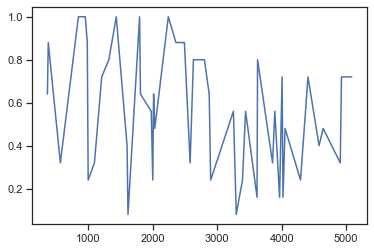

In [54]:
infant.age.plot()

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [56]:
# Showing rows where values for bmi are missing
missing_bmi=stroke_data[pd.isnull(stroke_data.bmi)]
missing_bmi.count()
missing_bmi.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1981,8968,Female,42.0,0,0,Yes,Private,Urban,208.06,NaN,smokes,0
2339,170,Male,43.0,0,0,Yes,Govt_job,Rural,80.07,NaN,never smoked,0
1503,39202,Female,61.0,1,1,Yes,Private,Urban,237.58,NaN,formerly smoked,0
167,43364,Male,79.0,1,0,Yes,Private,Rural,75.02,NaN,never smoked,1
477,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,Unknown,0
146,41241,Male,65.0,0,0,Yes,Self-employed,Urban,68.43,NaN,formerly smoked,1
3164,1681,Female,68.0,0,0,No,Private,Urban,82.85,NaN,smokes,0
1293,68003,Male,46.0,1,0,Yes,Private,Rural,73.72,NaN,smokes,0
1650,16488,Female,57.0,1,0,Yes,Private,Urban,210.00,NaN,never smoked,0
2828,42545,Male,29.0,1,0,Yes,Private,Urban,77.55,NaN,formerly smoked,0


In [57]:
stroke_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


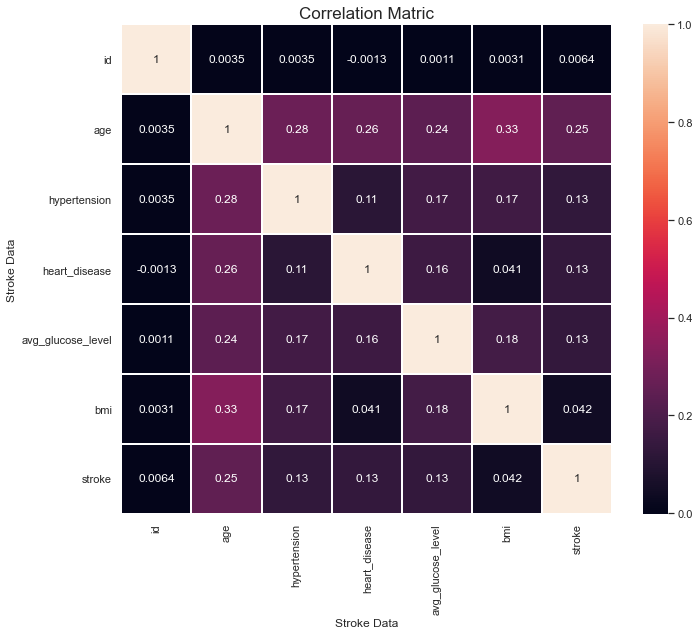

In [58]:
# Visualisation of the corralation table
correlation = stroke_data.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matric', size=17)
plt.xlabel('Stroke Data')
plt.ylabel('Stroke Data')
plt.show()

As there are no strong correlations within the numeric data, I will change the other columns into numeric data to include them into the correlation.

In [59]:
stroke_data.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.014819,0.100447,-0.060343,0.067657,0.055987,0.054938,-0.014220,0.796084,0.107611,0.029598,0.372908
gender,0.014819,1.000000,-0.014270,-0.021390,0.085749,-0.029366,-0.066212,-0.005529,0.007427,0.027786,-0.039693,0.009200
age,0.100447,-0.014270,1.000000,-0.221879,0.202440,0.549738,0.292564,0.019179,0.071812,0.148365,0.285154,0.214024
hypertension,-0.060343,-0.021390,-0.221879,1.000000,-0.108306,-0.164243,-0.075097,0.007913,-0.048369,-0.037112,-0.129012,-0.127904
heart_disease,0.067657,0.085749,0.202440,-0.108306,1.000000,0.114644,0.058263,0.003092,0.054106,0.087683,0.064671,0.134914
ever_married,0.055987,-0.029366,0.549738,-0.164243,0.114644,1.000000,0.375944,0.006261,0.028024,0.113109,0.303694,0.108340
work_type,0.054938,-0.066212,0.292564,-0.075097,0.058263,0.375944,1.000000,-0.014573,0.028536,0.178603,0.307774,0.058224
Residence_type,-0.014220,-0.005529,0.019179,0.007913,0.003092,0.006261,-0.014573,1.000000,0.006537,-0.030958,-0.004656,0.015458
avg_glucose_level,0.796084,0.007427,0.071812,-0.048369,0.054106,0.028024,0.028536,0.006537,1.000000,0.111966,0.013996,0.350555
bmi,0.107611,0.027786,0.148365,-0.037112,0.087683,0.113109,0.178603,-0.030958,0.111966,1.000000,0.093023,0.191573


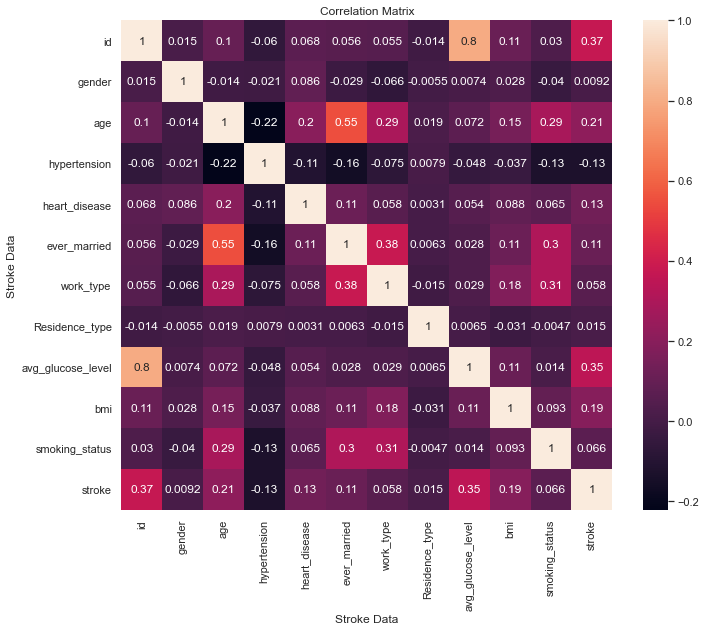

In [60]:
# Visualisation of the correlation table
correlation_matrix = stroke_data.apply(lambda x: x.factorize()[0]).corr(method='pearson')
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix")
plt.xlabel("Stroke Data")
plt.ylabel("Stroke Data")
plt.show()

In [61]:
# Showing the highest correlations in descending order
correlation_mat = correlation_matrix
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False).where(corr_pairs < 1.0)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.3]
print(strong_pairs)

id                 avg_glucose_level    0.796084
avg_glucose_level  id                   0.796084
ever_married       age                  0.549738
age                ever_married         0.549738
work_type          ever_married         0.375944
ever_married       work_type            0.375944
id                 stroke               0.372908
stroke             id                   0.372908
avg_glucose_level  stroke               0.350555
stroke             avg_glucose_level    0.350555
smoking_status     work_type            0.307774
work_type          smoking_status       0.307774
ever_married       smoking_status       0.303694
smoking_status     ever_married         0.303694
dtype: float64


In [62]:
# Creating new columns with numeric values for gender and status
stroke_data['gender_number'] = np.where((stroke_data['gender'] == "Female"), 1, 0)
stroke_data['married_number'] = np.where((stroke_data['ever_married'] == 'Yes'),1, 0)
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_number,married_number
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1


# Analysing Patterns using Visualisation

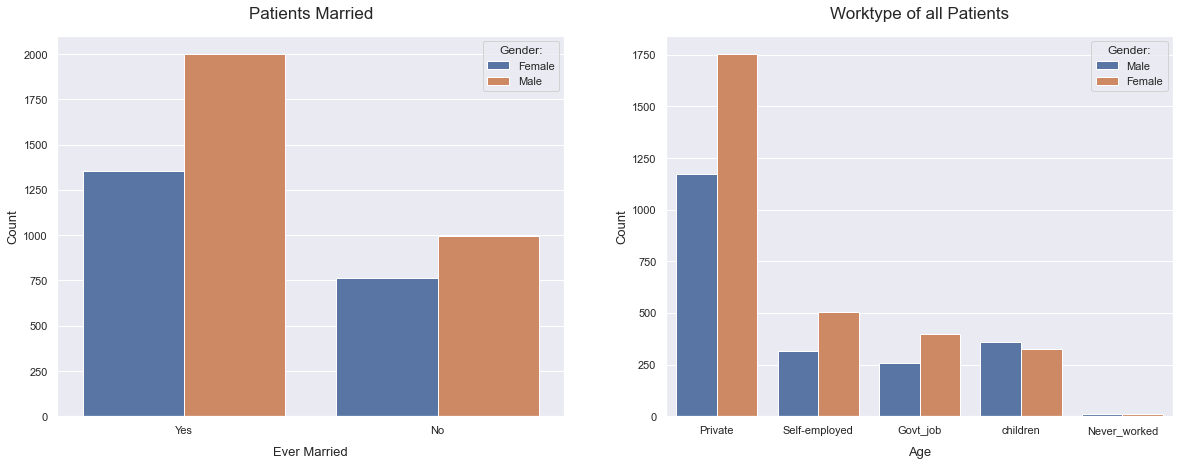

In [63]:

# GENERAL INFORMATION ABOUT PATIENTS
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.countplot(x='ever_married',hue='gender_number', data=stroke_data, ax=ax[0])
ax[0].set_title('Patients Married', size=17, pad=17)
ax[0].set_xlabel('Ever Married', size=13, labelpad=11)
ax[0].set_ylabel('Count', size=13)
ax[0].legend(loc='upper right', title='Gender:', labels=['Female','Male'])

sns.countplot(x='work_type',hue='gender_number', data=stroke_data, ax=ax[1])
ax[1].set_title('Worktype of all Patients', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)
ax[1].legend(loc='upper right', title='Gender:', labels=['Male','Female'])

plt.show()

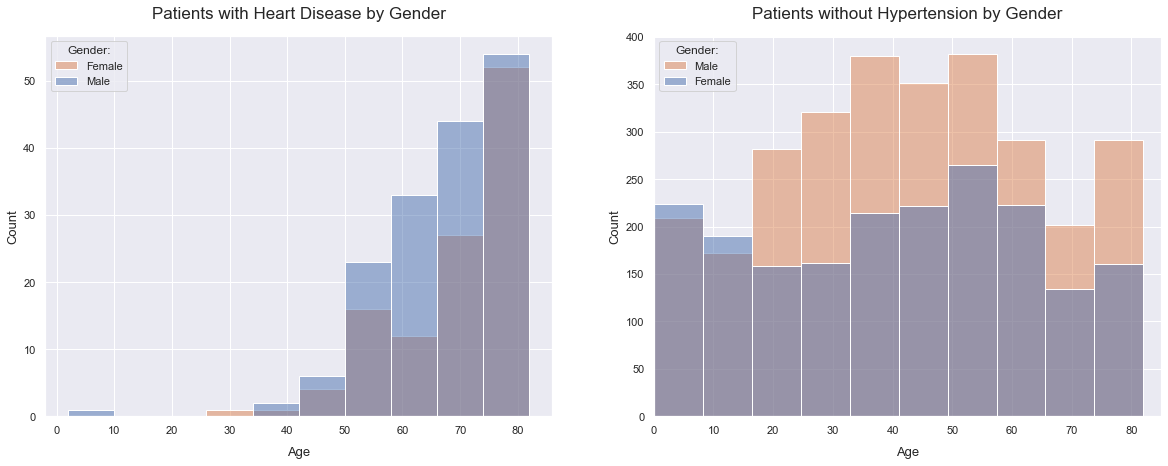

In [64]:
heart_diseases = stroke_data.loc[(stroke_data.heart_disease == 1)]
no_heart_disease = stroke_data.loc[(stroke_data.heart_disease == 0)]

fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.histplot(x='age',hue='gender_number', data=heart_diseases, ax=ax[0], bins=10)
ax[0].set_title('Patients with Heart Disease by Gender', size=17, pad=17)
ax[0].set_xlabel('Age', size=13, labelpad=11)
ax[0].set_ylabel('Count', size=13)
ax[0].legend(loc='upper left', title='Gender:', labels=['Female','Male'])


sns.histplot(x='age', hue='gender_number',data=no_heart_disease, ax=ax[1], bins=10)
ax[1].set_title('Patients without Hypertension by Gender', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)
ax[1].legend(loc='upper left', title='Gender:', labels=['Male','Female'])

plt.xlim(0,85)
plt.show()

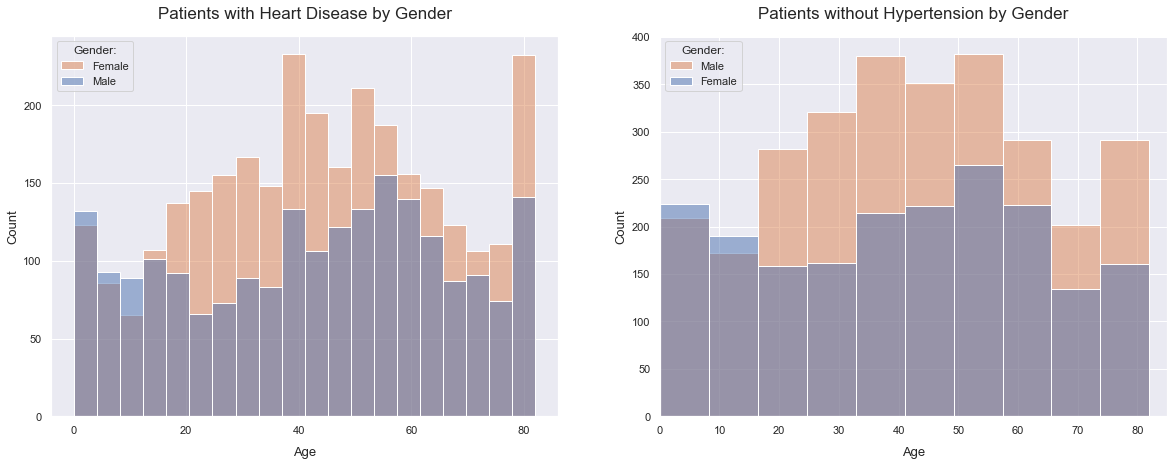

In [65]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.histplot(x='age',hue='gender_number', data=stroke_data, ax=ax[0])
ax[0].set_title('Patients with Heart Disease by Gender', size=17, pad=17)
ax[0].set_xlabel('Age', size=13, labelpad=11)
ax[0].set_ylabel('Count', size=13)
ax[0].legend(loc='upper left', title='Gender:', labels=['Female','Male'])


sns.histplot(x='age', hue='gender_number',data=no_heart_disease, ax=ax[1], bins=10)
ax[1].set_title('Patients without Hypertension by Gender', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)
ax[1].legend(loc='upper left', title='Gender:', labels=['Male','Female'])

plt.xlim(0,85)
plt.show()

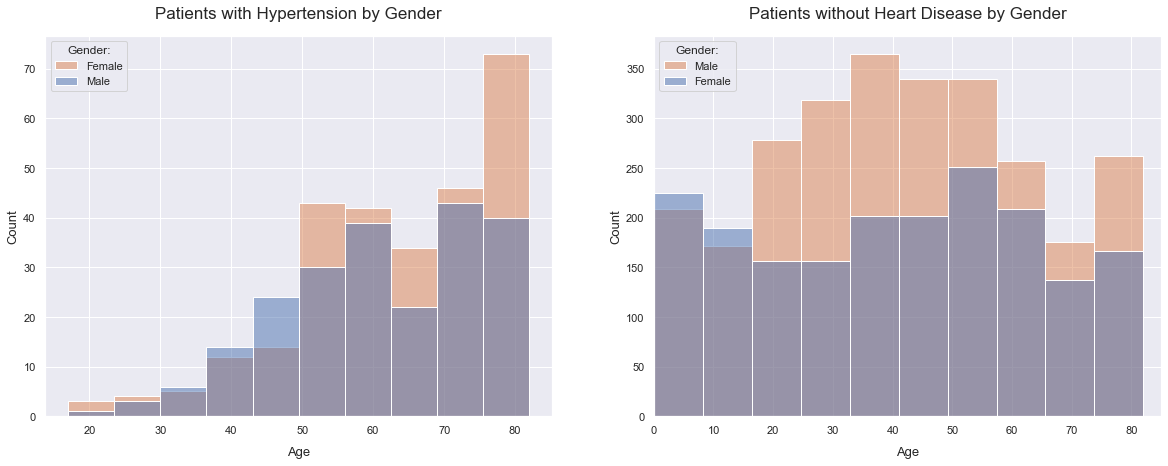

In [66]:
hypertension = stroke_data.loc[(stroke_data.hypertension == 1)]
no_hypertension = stroke_data.loc[(stroke_data.hypertension == 0)]

fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.histplot(x='age',hue='gender_number', data=hypertension, ax=ax[0], bins=10)
ax[0].set_title('Patients with Hypertension by Gender', size=17, pad=17)
ax[0].set_xlabel('Age', size=13, labelpad=11)
ax[0].set_ylabel('Count', size=13)
ax[0].legend(loc='upper left', title='Gender:', labels=['Female','Male'])


sns.histplot(x='age',hue='gender_number', data=no_hypertension, ax=ax[1], bins=10)
ax[1].set_title('Patients without Heart Disease by Gender', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)
ax[1].legend(loc='upper left', title='Gender:', labels=['Male','Female'])

plt.xlim(0,85)
plt.show()

# 
AGE

<ipython-input-67-c56810a6c339>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


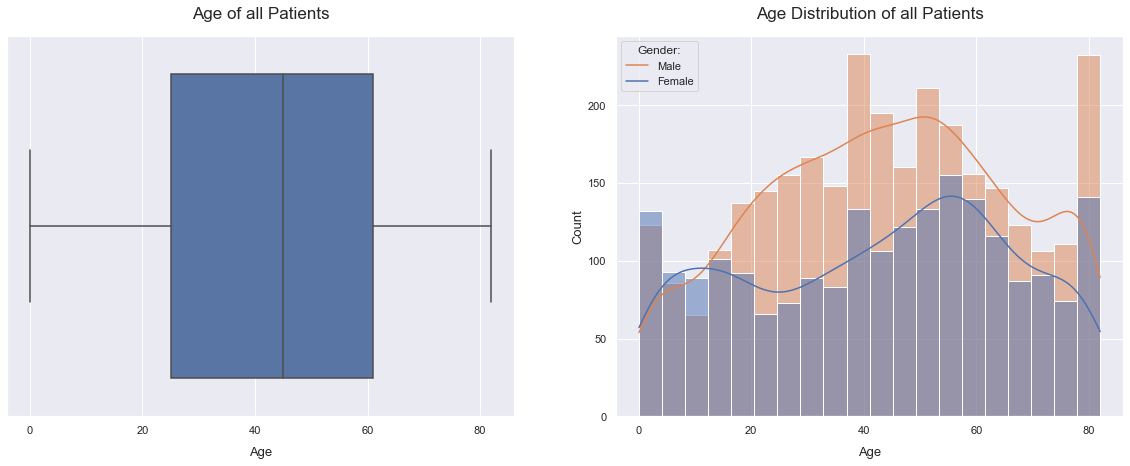

In [67]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.boxplot(x="age", data=stroke_data, ax=ax[0])
ax[0].set_title('Age of all Patients', size=17, pad=17)
ax[0].set_xlabel('Age', size=13, labelpad=11)

sns.histplot(x='age', hue='gender_number', data=stroke_data, ax=ax[1], kde=True)
ax[1].set_title('Age Distribution of all Patients', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)
ax[1].legend(loc='upper left', title='Gender:', labels=['Male','Female'])

fig.show()

In [68]:
# Calculating males and females suffering a stroke

# Females:
female_stroke = stroke_data.loc[(stroke_data.stroke == 1) & (stroke_data.gender == 'Female')]
number_female_stroke = female_stroke.value_counts().sum()
# Males:
male_stroke = stroke_data.loc[(stroke_data.stroke == 1) & (stroke_data.gender == 'Male')]
number_male_stroke = male_stroke.value_counts().sum()
# Total:
total_strokes = number_male_stroke + number_female_stroke

print('NUMBER OF STROKES:\nFemales:\t{}\nMales:\t\t{}\nTOTAL:\t\t{}'.format(number_female_stroke, number_male_stroke,total_strokes))

NUMBER OF STROKES:
Females:	120
Males:		89
TOTAL:		209


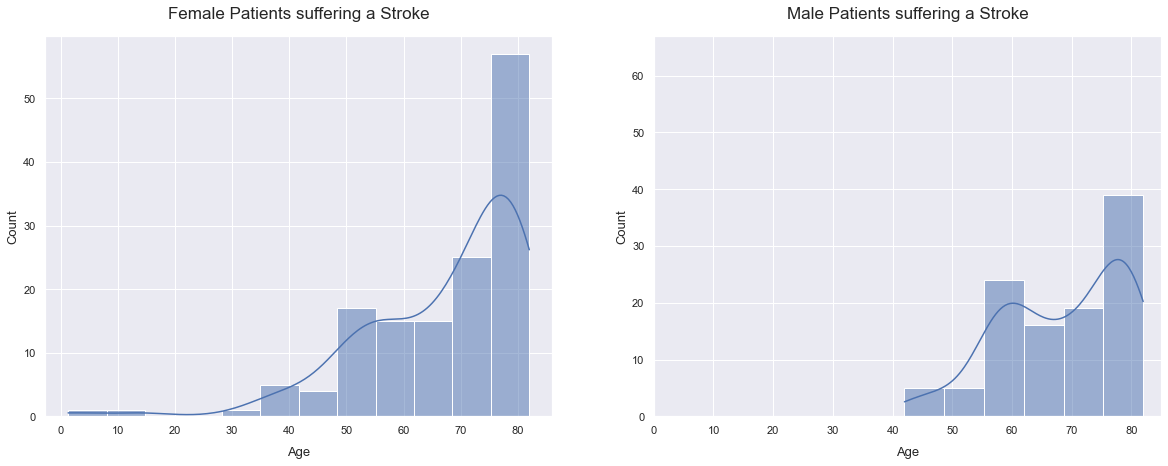

In [69]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.histplot(x='age', data=female_stroke, ax=ax[0], bins=12, kde=True)
ax[0].set_title('Female Patients suffering a Stroke', size=17, pad=17)
ax[0].set_xlabel('Age', size=13, labelpad=11)
ax[0].set_ylabel('Count', size=13)


sns.histplot(x='age', data=male_stroke, ax=ax[1], bins=6, kde=True)
ax[1].set_title('Male Patients suffering a Stroke', size=17, pad=17)
ax[1].set_xlabel('Age', size=13, labelpad=11)
ax[1].set_ylabel('Count', size=13)

plt.ylim(0, 67)
plt.xlim(0, 85)
plt.show()

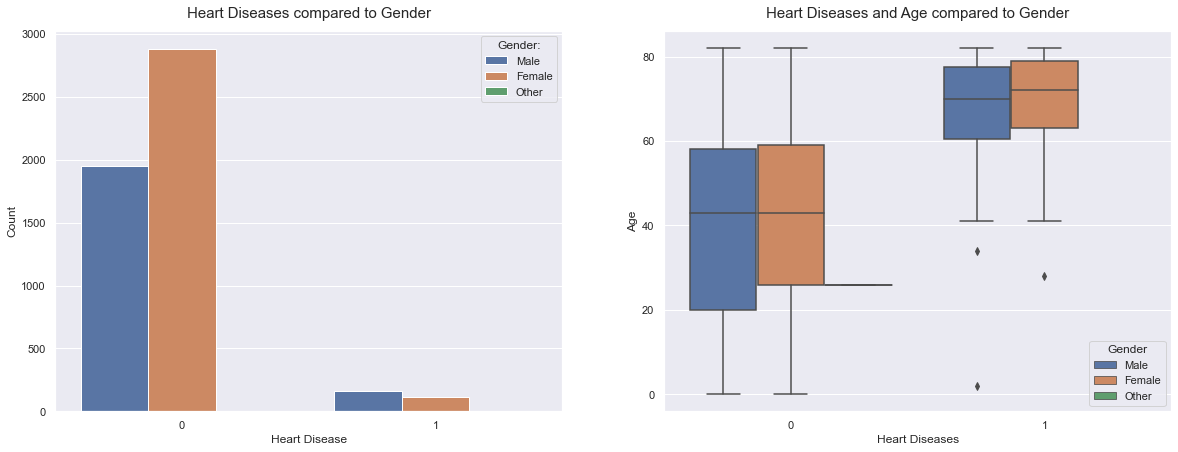

In [70]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.countplot(x='heart_disease', hue='gender', data=stroke_data, ax=ax[0])
ax[0].set_title('Heart Diseases compared to Gender', size=15, pad=13)
ax[0].set_xlabel('Heart Disease')
ax[0].set_ylabel('Count')
ax[0].legend(loc='upper right',title='Gender:')


sns.boxplot(x='heart_disease',y='age', hue='gender', data=stroke_data, ax=ax[1])
ax[1].set_title('Heart Diseases and Age compared to Gender', size=15, pad=13)
ax[1].set_xlabel('Heart Diseases')
ax[1].set_ylabel('Age')
ax[1].legend(loc='lower right',title='Gender')

plt.show()

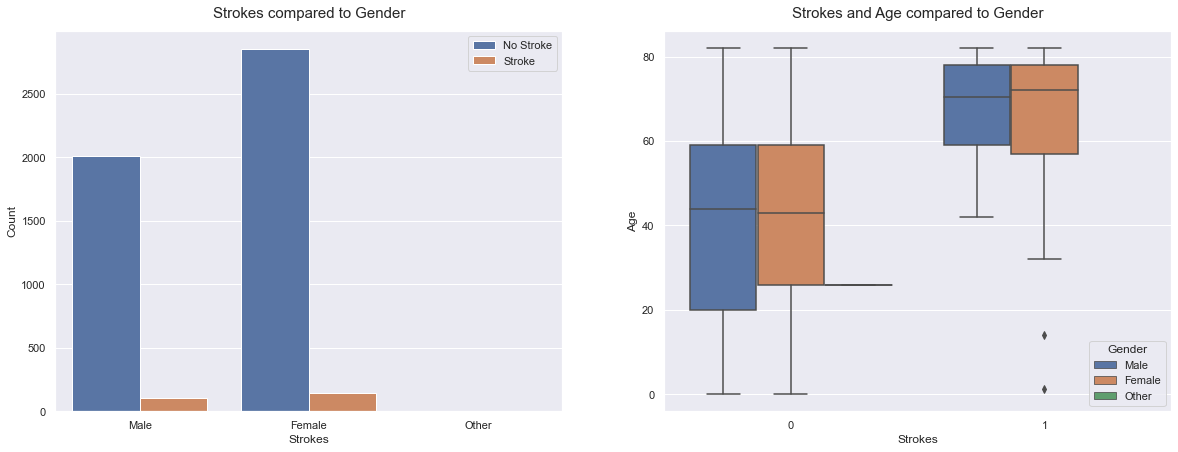

In [71]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.countplot(x='gender', hue='stroke', data=stroke_data, ax=ax[0])
ax[0].set_title('Strokes compared to Gender', size=15, pad=13)
ax[0].set_xlabel('Strokes')
ax[0].set_ylabel('Count')
ax[0].legend(loc='upper right', labels=['No Stroke','Stroke'])


sns.boxplot(x='stroke',y='age', hue='gender', data=stroke_data, ax=ax[1])
ax[1].set_title('Strokes and Age compared to Gender', size=15, pad=13)
ax[1].set_xlabel('Strokes')
ax[1].set_ylabel('Age')
ax[1].legend(loc='lower right',title='Gender')

plt.show()

In [72]:
pip install ycimpute

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ali\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [73]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ycimpute.imputer import knnimput

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix


from scipy.stats import friedmanchisquare
from statsmodels.stats.contingency_tables import mcnemar

In [74]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ali\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [75]:
data = pd.read_csv('healthcare-dataset-stroke-data')
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'healthcare-dataset-stroke-data'

In [ ]:
data.info()

In [ ]:
data.describe(include='all').T

In [ ]:
stroke = data["stroke"]

In [ ]:
stroke.describe()

In [ ]:
# Exploratory Data Analysis(EDA)
# First of all, we will look at features based on the target values ( 'stroke').
corrmat = data.corr()

In [ ]:
plt.subplots(figsize=(10,7))
sns.heatmap(corrmat, vmax=1,cmap="GnBu", square=True)

In [ ]:
corr_stroke = data.corrwith(stroke, axis=0)
corr_stroke = pd.DataFrame(corr_stroke)
corr_stroke.rename (columns = {0: 'stroke'}, inplace = True)

#Oluşturulan korelasyon matrisinin görselleştirilmesi
plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_stroke, vmax=1, cmap="GnBu",fmt='.4f',annot=True);

In [ ]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=data, ax=gender_stroke, palette="Set2")
sns.despine()

gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=gender_stroke)
sns.countplot(x='stroke', hue='gender', data=data, ax=gender_stroke, palette="Set2")
sns.despine()

plt.show()

In [ ]:
data.groupby('gender')["stroke"].count()

In [ ]:
data.groupby(['gender', 'stroke'])['stroke'].count()

In [ ]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='work_type', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='work_type', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()


plt.show()

In [ ]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Residence_type', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='Residence_type', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()


plt.show()

In [ ]:
data.groupby(['Residence_type', 'stroke'])['stroke'].count()

# Ever Married & Stroke

In [ ]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='ever_married', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='ever_married', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

plt.show()

In [ ]:
data.groupby(['ever_married', 'stroke'])['stroke'].count()

Smoking & Stroke

In [ ]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='smoking_status', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='smoking_status', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

plt.show()

In [ ]:
data['smoking_status'].value_counts()

In [ ]:
data.groupby(['smoking_status', 'stroke'])['stroke'].count()

It can be said that the correlation between stroke and smoking status is low, since the rate of stroke survivors is close between different smoking situations.

Age & Stroke

In [ ]:
f,ax = plt.subplots(1,2, figsize=(20,10));

data.loc[data['stroke'] ==0]['age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue');
ax[0].set_title('stroke = 0');
ax1 = list(range(0, 85, 5));
ax[0].set_xticks(ax1);

data[data['stroke']==1]['age'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black');
ax[1].set_title('stroke=1');
x2=list(range(0, 85, 5));
ax[1].set_xticks(x2);
plt.show();

It is seen that the risk of stroke increases with age

Hypertension & Stroke

In [ ]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='hypertension', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='hypertension', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()


plt.show()

In [ ]:
data['hypertension'].value_counts()

In [ ]:
data.groupby(['hypertension', 'stroke'])['stroke'].count()

Heart Disease & Stroke

In [ ]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='heart_disease', hue='stroke', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='heart_disease', data=data, ax=ax_gender_stroke, palette='Set2')
sns.despine()

plt.show()

In [ ]:
data['heart_disease'].value_counts()

In [ ]:
data.groupby(['heart_disease', 'stroke'])['stroke'].count()

Features of hypertension and heart disease have been found to be correlation with stroke.

Glucose_level

In [ ]:
sns.kdeplot('avg_glucose_level', data=data, shade=True,color="salmon")
sns.set_style("white")
sns.despine()

In [ ]:
f,ax = plt.subplots(1,2, figsize=(20,10))

data.loc[data['stroke'] ==0]['avg_glucose_level'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(30, 300, 10))
ax[0].set_xticks(ax1)

data.loc[data['stroke']==1]['avg_glucose_level'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(30, 300, 10))
ax[1].set_xticks(x2)
plt.show()

BMI

In [ ]:
f,ax = plt.subplots(1,2, figsize=(15,7))

data.loc[data['stroke'] ==0]['bmi'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 70, 5))
ax[0].set_xticks(ax1)

data.loc[data['stroke']==1]['bmi'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(0, 70, 5))
ax[1].set_xticks(x2)
plt.show()

# DATA CLEANING AND EXAMINATION OF MISSING DATA

In [ ]:
data = data.drop("id", axis="columns")
data.head()

In [ ]:
data_delete = data[data['gender'] == 'Other'].index
data.drop(data_delete)

The "other" attribute in the gender column was deleted as an outlier.

In [ ]:
smoking_status = data['smoking_status']
smoking_status

In [ ]:
for index in range(smoking_status.size):
    if smoking_status.iloc[index] == "Unknown":
        smoking_status.iloc[index] = np.nan

smoking_status

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Toplam'])
missing_data = missing_data
missing_data.head(12)

In [ ]:
ever_married = data["ever_married"]
ever_married

In [ ]:
ever_married = data["ever_married"]
for index in range(ever_married.size):
    if ever_married.iloc[index] == "Yes":
        ever_married.iloc[index] = 1
    else:
        ever_married.iloc[index] = 0

data["ever_married"] = ever_married
data["ever_married"].value_counts()

In [ ]:
data["ever_married"].value_counts()

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Toplam'])
missing_data = missing_data
missing_data.head(12)

Body mass index (BMI) can be defined as the measurement of a person's weight in proportion to his or her weight. In other words, it is obtained by dividing the person's weight in kilograms by the square of their height in meters.

BMI = body weight (kg) / (height(m) x height(m))

We will use KNN to complete the missing data in the BMI column, the first we will create dummy data

In [ ]:
data_copy = data.copy()

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorial_cols = []

for col in data_copy.columns:
    if data_copy[col].dtype not in numeric_dtypes:
        categorial_cols.append(col)
    else:
        continue

data_dummy = pd.get_dummies(data_copy[categorial_cols])
data_copy = data.drop(categorial_cols, axis='columns')
data_dummy  = pd.concat([data_copy,data_dummy], axis=1)

data_dummy.head()

In [ ]:
var_names = list(data_dummy)
array_data = np.array(data_dummy)
data_dummy = knnimput.KNN(k = 4).complete(array_data)
data_dummy = pd.DataFrame(data_dummy, columns = var_names)

In [ ]:
data_dummy.head(10)

In [ ]:
total = data_knn_dummy.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Toplam'])
missing_data = missing_data
missing_data.head(12)

In [ ]:
X = data_dummy
y = stroke
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

# RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier()

rf_params = {"max_depth": [2,5],
             "max_features": [2,3],
             "n_estimators": [2,5,10,15],
             "min_samples_split": [2,3]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

In [ ]:
data_grid_rf = pd.DataFrame(rf_cv_model.cv_results_)
data_grid_rf

In [ ]:
rf_best_model=rf_cv_model.best_estimator_

#Best model score

rf_crossVal = rf_cv_model.best_score_
rf_crossVal

In [ ]:
rf_best_model.fit(X_train, y_train)

In [ ]:
rf_best_model.score(X_test, y_test)

In [ ]:
y_pred_rf = rf_best_model.predict(X_test)
y_pred_rf

In [ ]:
svc_model = SVC()

svc_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-6],'C': [2, 10,25]}]

svc_cv_model = GridSearchCV(svc_model, svc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
print("Best parameters: " + str(svc_cv_model.best_params_))

In [ ]:
data_grid_svc = pd.DataFrame(svc_cv_model.cv_results_)
data_grid_svc

In [ ]:
svc_best_model = svc_cv_model.best_estimator_

svc_crossVal = svc_cv_model.best_score_
svc_crossVal

In [ ]:
svc_best_model.fit(X_train, y_train)

In [ ]:
svc_best_model.score(X_test, y_test)

In [ ]:
y_pred_svc = svc_best_model.predict(X_test)
y_pred_svc

# LOGISTIC REGRESSION

In [ ]:
lg_model = LogisticRegression()

lg_params = {"C":np.logspace(-3,-4,4,3,7), "penalty":["l1","l2"]}


lg_cv_model = GridSearchCV(lg_model, lg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
print("Best Parameters: " + str(lg_cv_model.best_params_))


In [ ]:
data_grid_lg = pd.DataFrame(lg_cv_model.cv_results_)
data_grid_lg

In [ ]:
lg_best_model = lg_cv_model.best_estimator_

lg_crossVal = lg_cv_model.best_score_
lg_crossVal

In [ ]:
lg_best_model.fit(X_train, y_train)

In [ ]:
lg_best_model.score(X_test, y_test)

In [ ]:
y_pred_lg = lg_best_model.predict(X_test)
y_pred_lg

In [ ]:
models = [rf_best_model,svc_best_model,lg_best_model]

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*40)
    print(name + ":" )
    print("Test Accuracy: {:.4%}".format(accuracy))
    plot_confusion_matrix(model,X_test,y_test)
    plt.show()
    print(classification_report(y_test,y_pred))

In [ ]:
seeds=np.arange(10**4)
np.random.shuffle(seeds)
seeds

In [ ]:
seeds=seeds[:35]
seeds

In [ ]:
accuracy_rf = []
accuracy_svc = []
accuracy_lg = []

for i in seeds:
    X_train,X_test,y_train,y_tets=train_test_split(X,y,
                                                  test_size=0.30,
                                                  random_state=i,
                                                  stratify=y)
    rf_best_model.fit(X_train,y_train)
    rf_i_acc = rf_best_model.score(X_test,y_test)
    accuracy_rf.append(rf_i_acc)
    
    
    svc_best_model.fit(X_train,y_train)
    svc_i_acc = svc_best_model.score(X_test,y_test)
    accuracy_svc.append(svc_i_acc)
    
    lg_model.fit(X_train,y_train)
    lg_acc = lg_model.score(X_test,y_test)
    accuracy_lg.append(lg_acc)

In [ ]:
accuracy_rf

In [ ]:
accuracy_svc

In [ ]:
accuracy_lg

In [ ]:
d = {'rf_accuracy': accuracy_rf, 'svc_accuracy': accuracy_svc,'lg_accuracy': accuracy_lg}
accuracies = pd.DataFrame(data=d)
accuracies

In [ ]:
accuracies.describe().T

In [ ]:
sns.boxplot(data = accuracies, orient="h", palette="Set2")

In [ ]:
stat, p = friedmanchisquare(accuracy_rf, accuracy_svc ,accuracy_lg)
print('Statistics = %.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

There is a significant difference between the algorithms. Random forest was chosen as the best model because it is the random forest algorithm with the highest average of the prediction values

FINAL MODEL

In [ ]:
final_model = RandomForestClassifier(max_depth = 5, max_features = 3, n_estimators = 2)
final_tuned = final_model.fit(X_train,y_train)

y_pred_test = final_tuned.predict(X_test)
y_pred_test

In [ ]:
print('Training Accuracy: ',accuracy_score(y_train,final_model.predict(X_train)))
print('Test Accuracy: ',accuracy_score(y_test,final_model.predict(X_test)))